In [1]:
import json
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.cluster import KMeans
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
with open("/media/user-1/CameraTraps/NINA/Images/metadata.json") as f:
    metadata = json.load(f)

In [3]:
print(len(metadata['annotations']))

170633


In [4]:
x = []
y = []
label = []
coordinates = []
datetime = []
env = []

for anot in metadata['annotations']:
    coordinates.append((anot['Latitude'], anot['Longitude']))
    y.append(anot['Latitude'])
    x.append(anot['Longitude'])
    label.append(anot['Species'])
    dt = anot['datetime_vector']
    env.append(anot['env_vector'])
    if(np.array(dt).sum() == 0):
        month = 0
        day = 0
        hour = 0
    else:
        month = dt[:12].index(1.0) + 1
        day = dt[12:12+31].index(1.0) + 1
        hour = dt[12+31:].index(1.0)
    datetime.append(anot['datetime_vector'])

env = np.array(env)

In [5]:
norway_extent = [4, 32, 57, 71] # [min_lon, max_lon, min_lat, max_lat]

In [6]:
def plot_map(extent, coordinates):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # Set the map extent to focus on Norway
    ax.set_extent(extent)

    # Add map features
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Add gridlines
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

    # Plot each coordinate as a red dot
    for lat, lon in coordinates:
        plt.plot(lon, lat, marker='o', color='red', markersize=5, alpha=0.7, transform=ccrs.Geodetic())

    # Show the map
    plt.show()

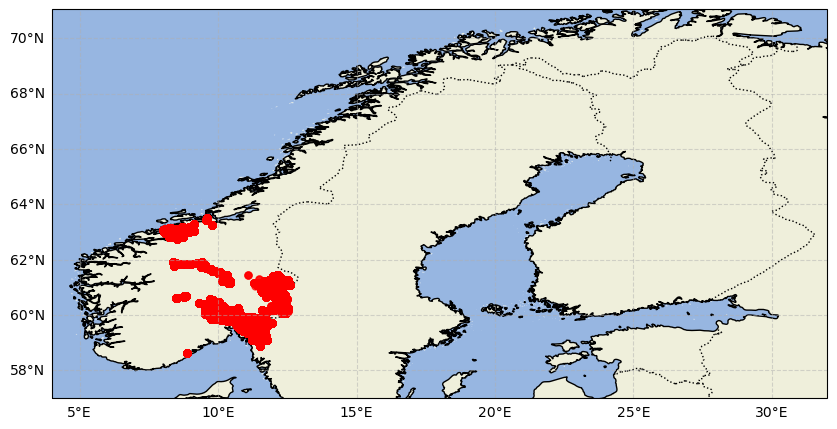

In [7]:
plot_map(norway_extent, coordinates)

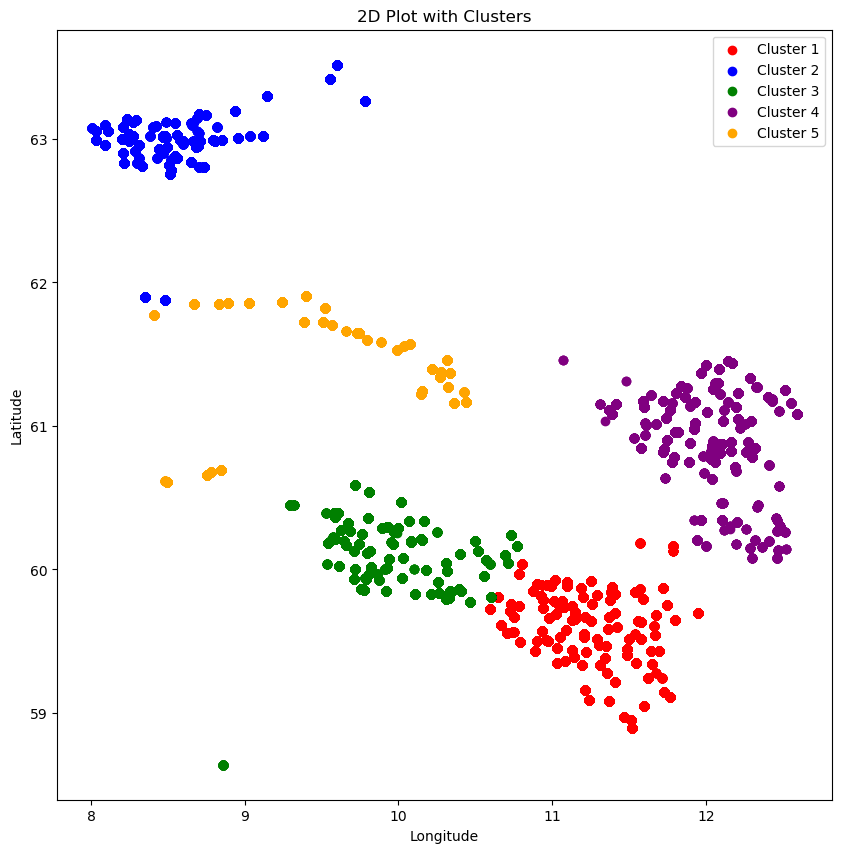

In [8]:
coordinates = np.column_stack((x, y))
n = 5
kmeans = KMeans(n_clusters=n, random_state=0, n_init='auto').fit(coordinates)
cluster_labels = kmeans.labels_

colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', "teal"]

plt.figure(figsize=(10, 10))
for i in range(n):
    cluster_points = coordinates[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('2D Plot with Clusters')
plt.show()

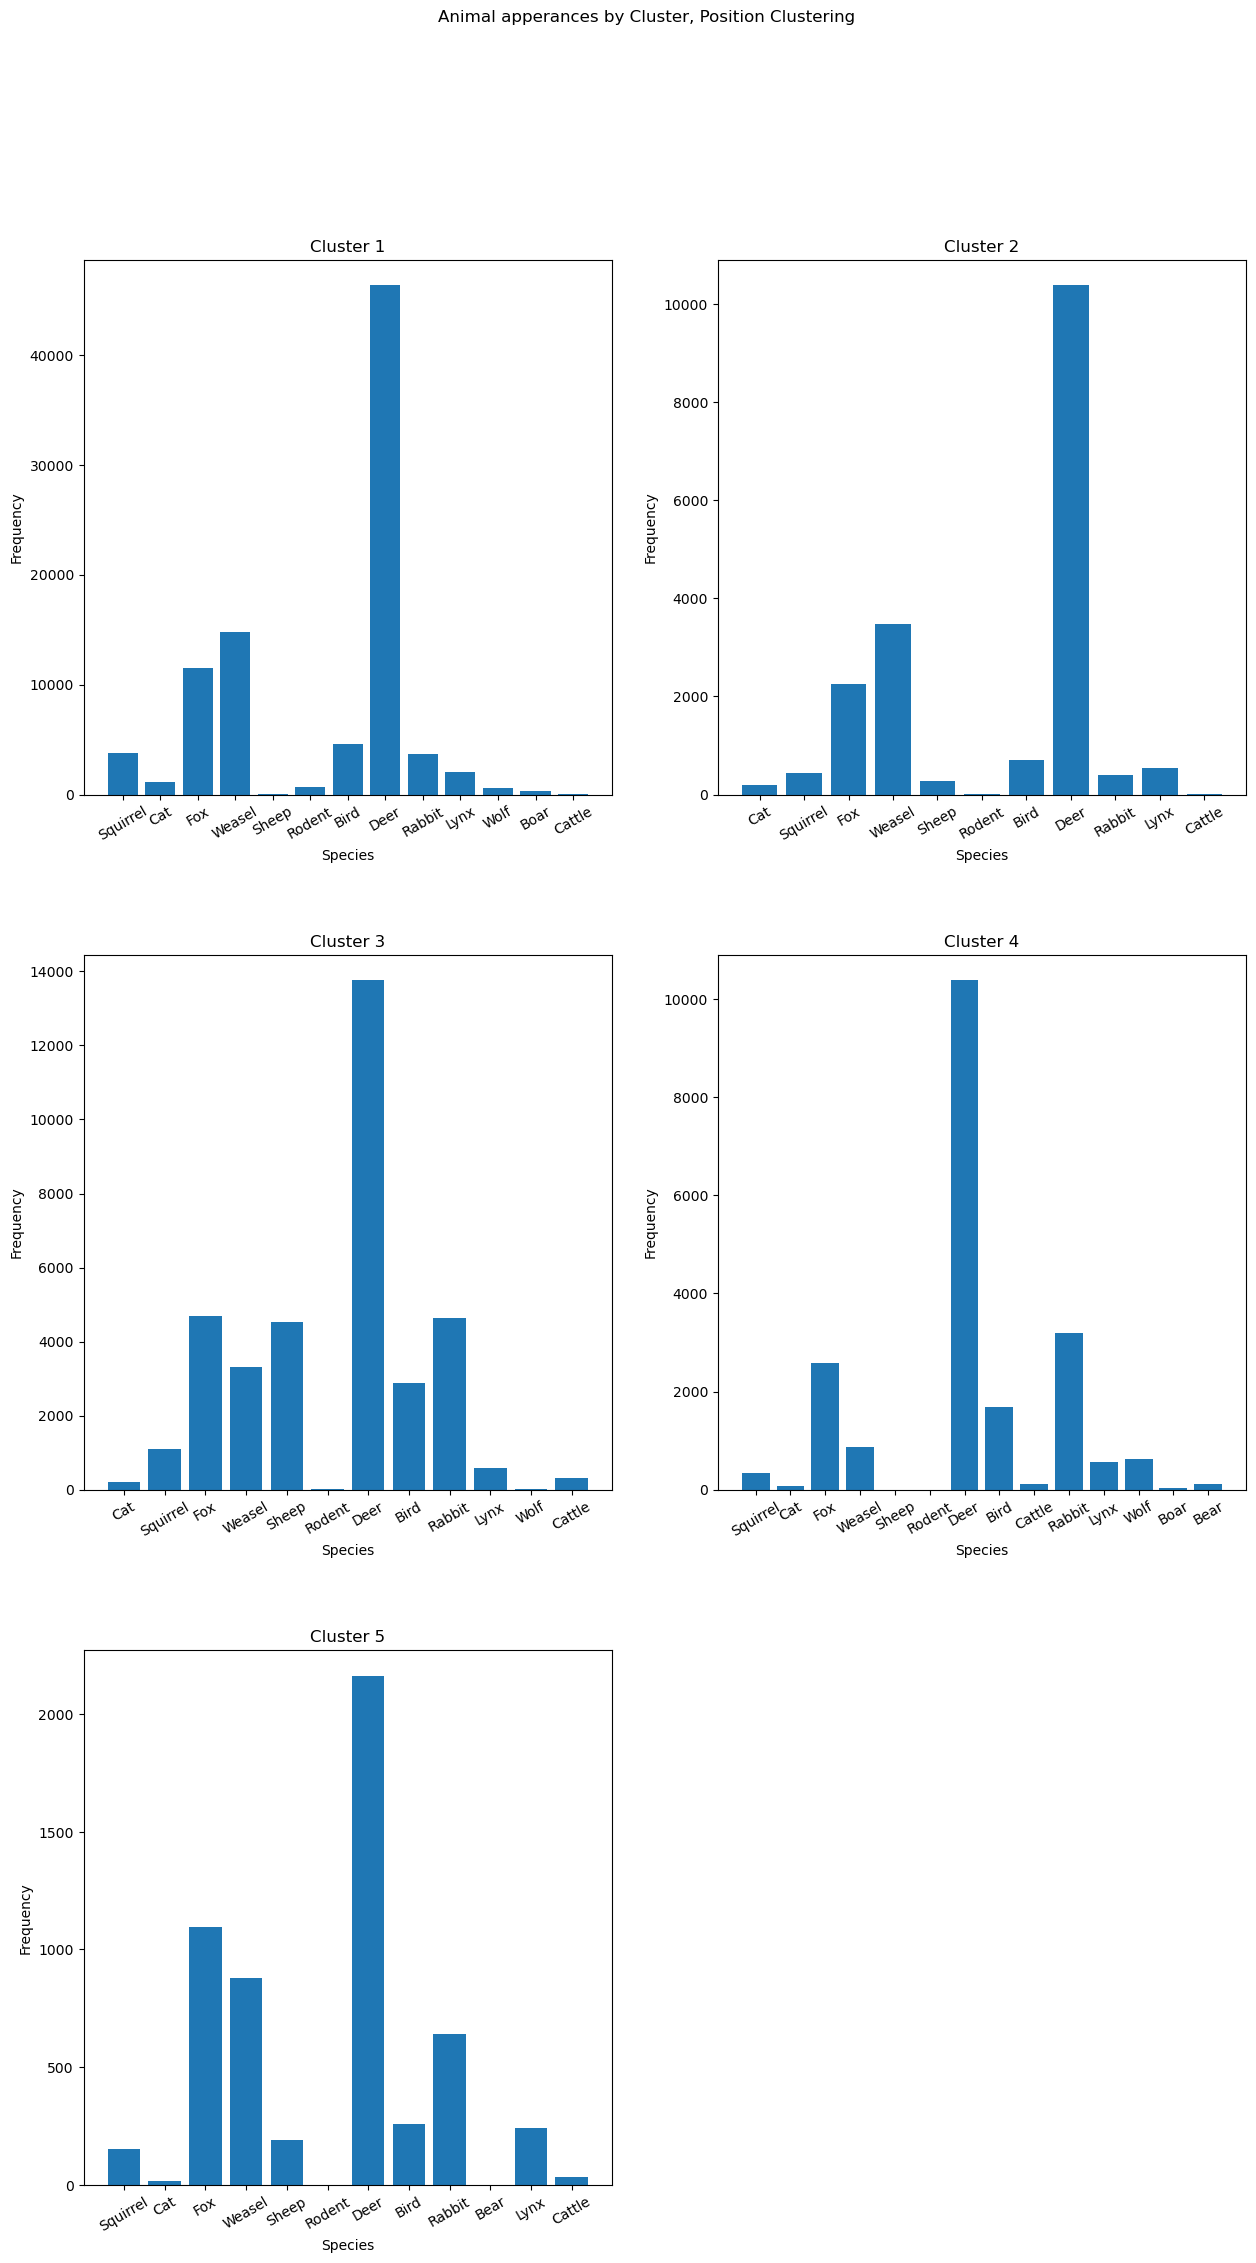

In [9]:
plt.figure(figsize=(15, 25))
for i in range(n):
    species_in_cluster = [label[j] for j in range(len(cluster_labels)) if cluster_labels[j] == i]
    species_count = {species: species_in_cluster.count(species) for species in set(species_in_cluster)}
    plt.subplot(n//2 + n%2, 2, i+1)
    plt.bar(species_count.keys(), species_count.values())
    plt.title(f'Cluster {i + 1}')
    plt.xlabel('Species')
    plt.ylabel('Frequency')
    plt.xticks(rotation=30)
    plt.subplots_adjust(hspace=0.3)

plt.suptitle("Animal apperances by Cluster, Position Clustering")
plt.show()

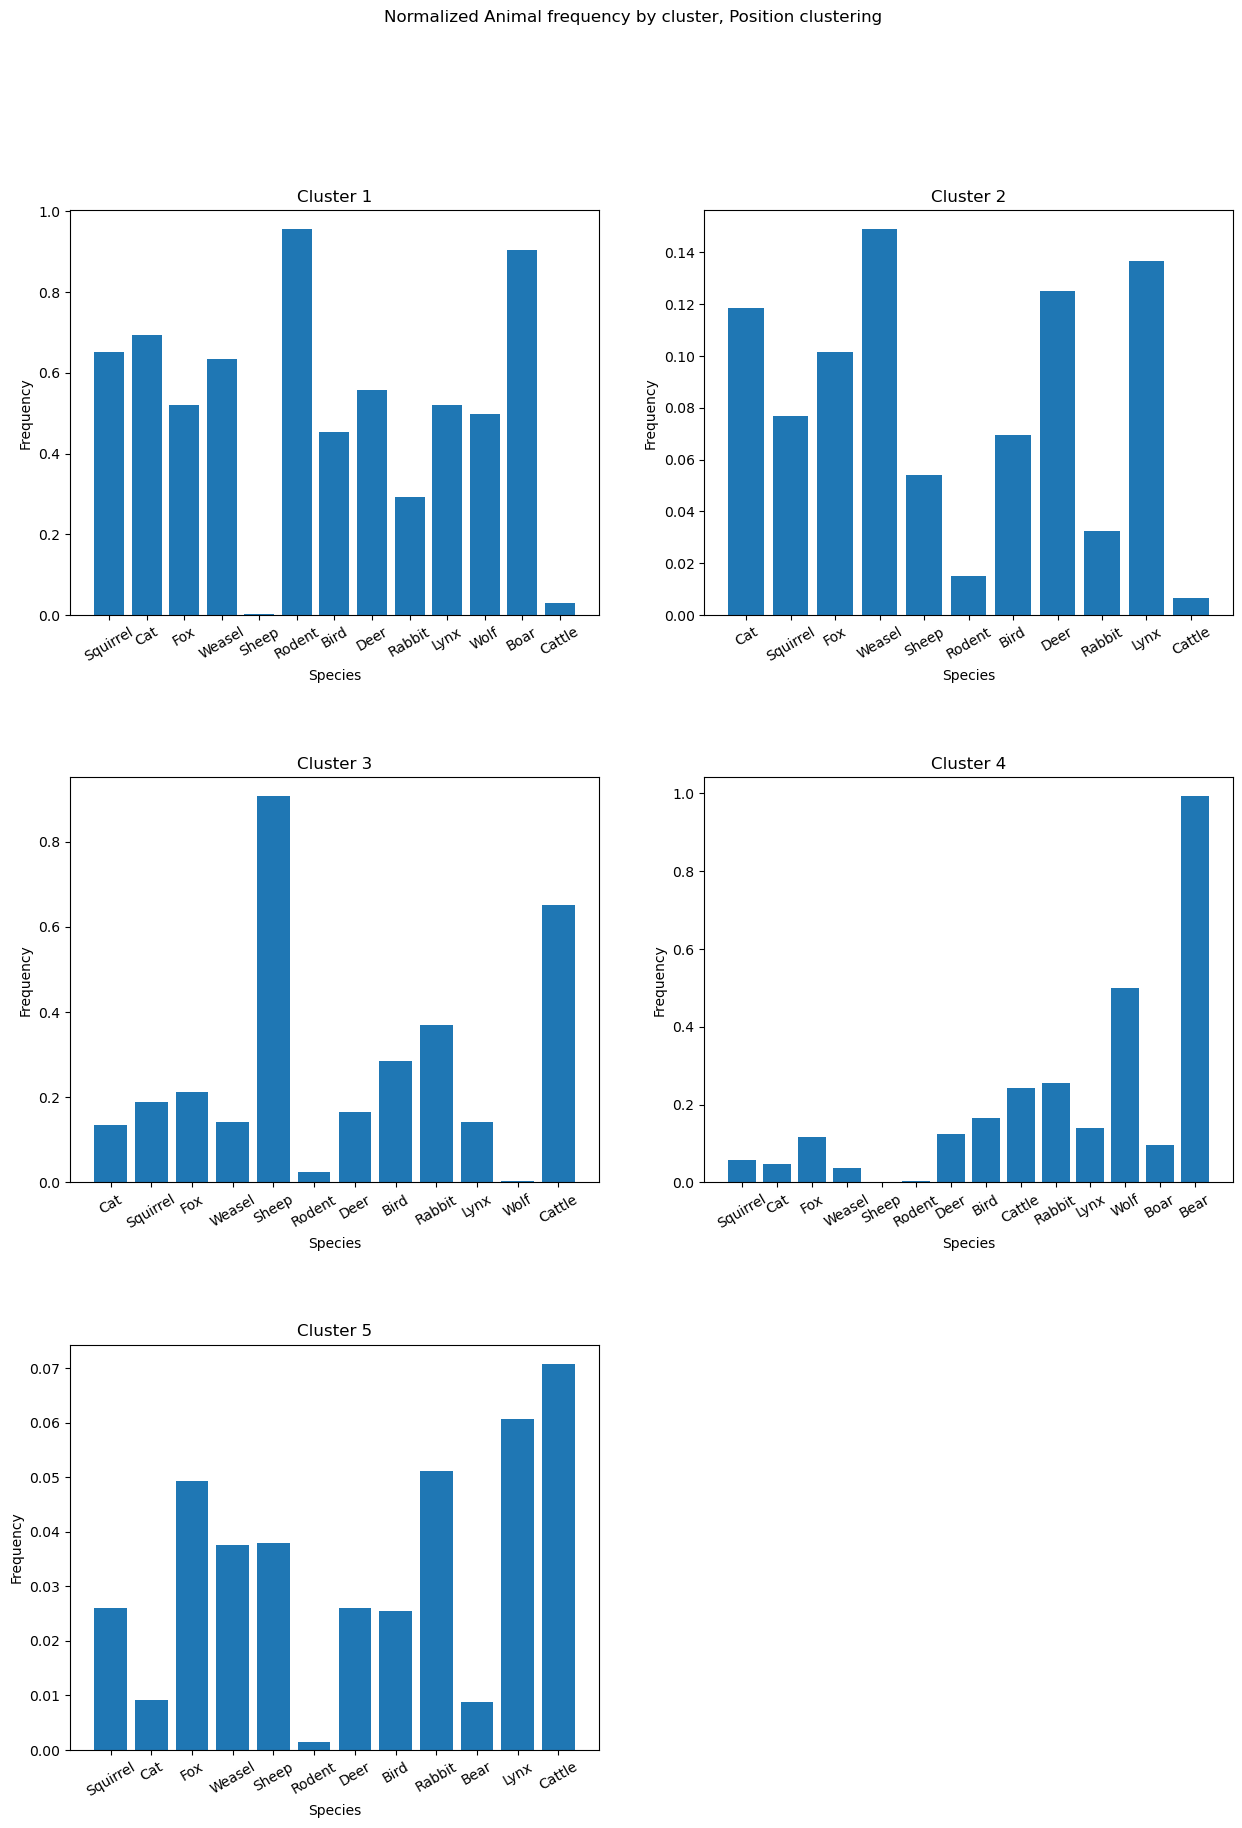

In [10]:
plt.figure(figsize=(15, 20))
for i in range(n):
    species_in_cluster = [label[j] for j in range(len(cluster_labels)) if cluster_labels[j] == i]
    species_count = {species: species_in_cluster.count(species) for species in set(species_in_cluster)}
    for key in species_count:
        species_count[key] = species_count[key]/metadata['categories'][key]
    plt.subplot(n//2 + n%2, 2, i+1)
    plt.bar(species_count.keys(), species_count.values())
    plt.title(f'Cluster {i + 1}')
    plt.xlabel('Species')
    plt.ylabel('Frequency')
    plt.xticks(rotation=30)
    plt.subplots_adjust(hspace=0.4)

plt.suptitle("Normalized Animal frequency by cluster, Position clustering")
plt.show()

In [11]:
datetime = np.array(datetime)
n = 2
kmeans = KMeans(n_clusters=n, random_state=0, n_init='auto').fit(datetime)
cluster_labels = kmeans.labels_

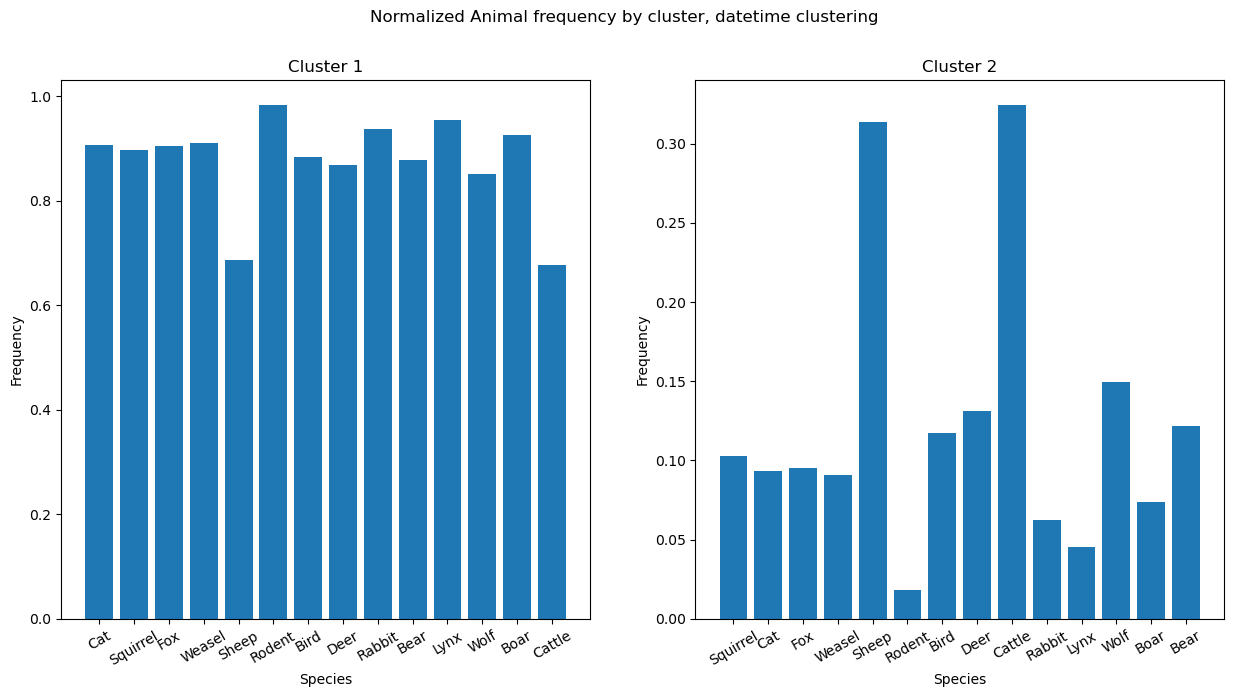

In [12]:
plt.figure(figsize=(15, 7))
for i in range(n):
    species_in_cluster = [label[j] for j in range(len(cluster_labels)) if cluster_labels[j] == i]
    species_count = {species: species_in_cluster.count(species) for species in set(species_in_cluster)}
    for key in species_count:
        species_count[key] = species_count[key]/metadata['categories'][key]
    plt.subplot(n//2 + n%2, 2, i+1)
    plt.bar(species_count.keys(), species_count.values())
    plt.title(f'Cluster {i + 1}')
    plt.xlabel('Species')
    plt.ylabel('Frequency')
    plt.xticks(rotation=30)
    plt.subplots_adjust(hspace=0.4)

plt.suptitle("Normalized Animal frequency by cluster, datetime clustering")
plt.show()

In [13]:
io = env[0][0]
scene = env[0][1:366]
attr = env[0][366:]
print(io, scene.shape, attr.shape)

0.8 (365,) (102,)


In [14]:
attributes = []
f = open("../py/places/labels_sunattribute.txt")
for line in f:
    attributes.append(line.strip())

In [74]:
tots = []
probs = []
above_zero = np.zeros(102)
for e in env:
    attr = e[366:]
    tots.append(attr)
    probs.append(e[1:366])
    above_zero[attr > 0] += 1

tots_arr = np.array(tots)
probs = np.array(probs)

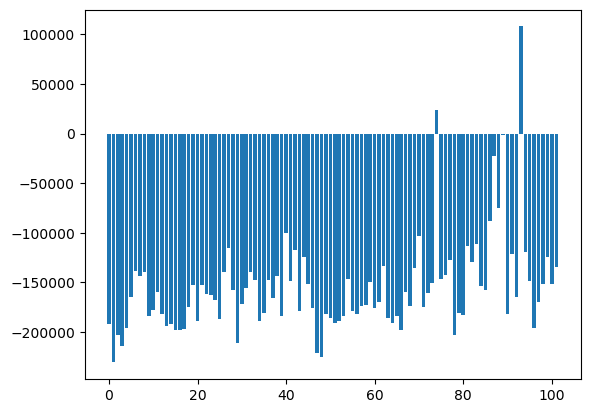

<BarContainer object of 102 artists>

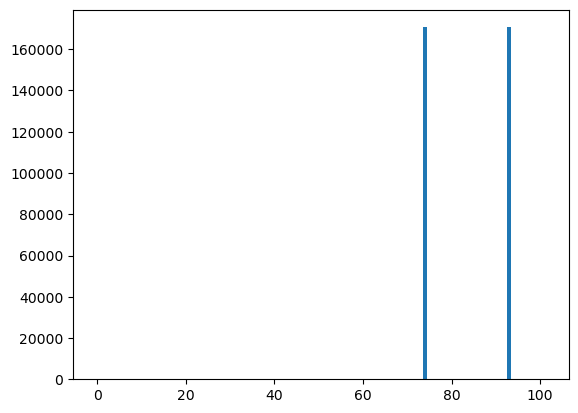

In [75]:
plt.bar(np.arange(102), tots_arr.sum(axis=0))
plt.show()
plt.bar(np.arange(102), above_zero)

In [76]:
vars = np.var(tots_arr, axis=0)
vars2 = np.var(probs, axis=0)
means2 = np.mean(probs, axis=0)

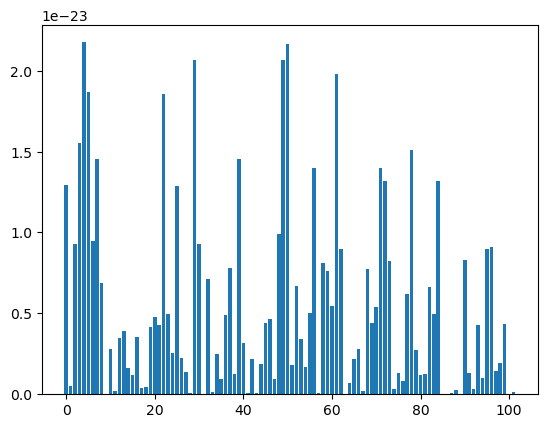

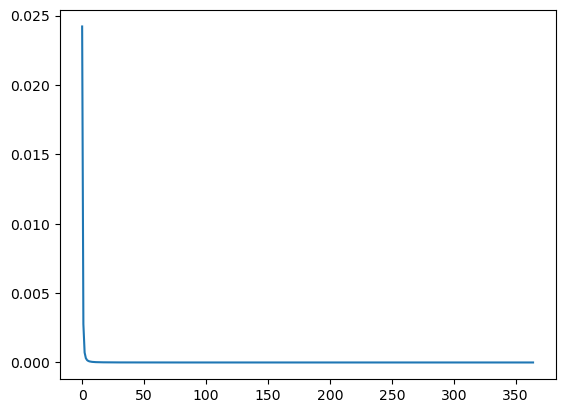

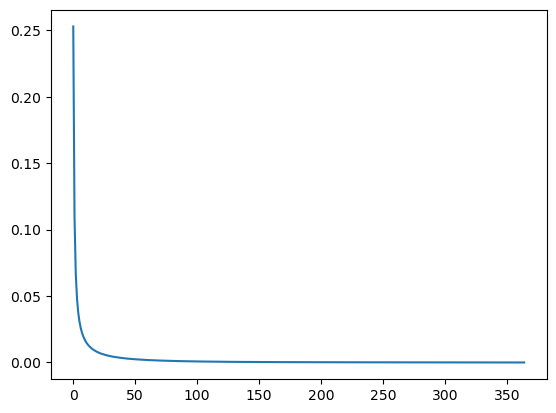

In [77]:
plt.bar(np.arange(102), vars)
plt.show()
plt.plot(vars2)
plt.show()
plt.plot(means2)

([<matplotlib.axis.YTick at 0x7f6a4107eaf0>,
 [Text(0, -1, '−1'), Text(0, 1, '1')])

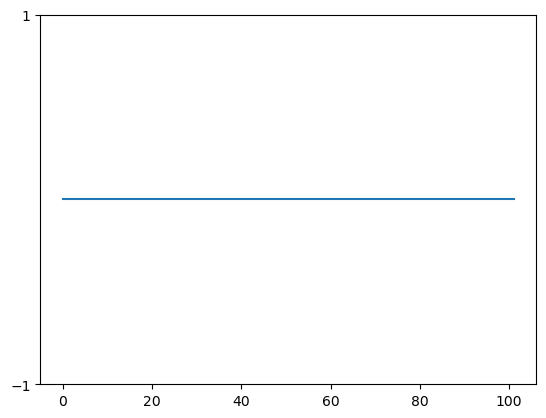

In [78]:
plt.plot(vars)
plt.yticks([-1, 1])

In [26]:
for i in range(102):
    if(above_zero[i] > 0):
        print(attributes[i])

natural light
no horizon


In [19]:
idx_a = np.argsort(tots)
keep_idx = []
for i in range(101, 63, -1):
    keep_idx.append(idx_a[i])

In [20]:
metadata['annotations'][0]

{'Date': '2022-07-22T23:26:33',
 'Temperature': '12',
 'Camera_Type': 'RECONYX',
 'Camera_Model': 'PC900 PROFESSIONAL',
 'Filename': '96624a46-4bc6-46c9-9770-370bf6d84718.jpg',
 'Exposure_Time': '0,03333333333',
 'ISO': '250',
 'Brightness': '0',
 'Contrast': '160',
 'Sharpness': '32',
 'Saturation': '0',
 'Latitude': 62.99270342525356,
 'Longitude': 8.852750551511205,
 'Species': 'Fox',
 'datetime_vector': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0],
 'env_vector': [0.8,
  0.0601,
  0.0527,
  0.0401,
  0.0291,
  0.0275,
  0.0251,
  0.024,
  0.0209,
  0.0184,
  0.0172,


In [21]:
len(keep_idx)

38

In [29]:
s = ""
for i in keep_idx:
    s += (attributes[i] + ", ")

print(s)

no horizon, natural light, open area, natural, man-made, cold, trees, snow, dirty, moist, farming, vegetation, rugged scene, enclosed area, scary, foliage, aged, dry, dirt, stressful, ice, hiking, camping, spectating, using tools, indoor lighting, wire, climbing, sunny, metal, fencing, digging, vertical components, grass, cloth, fire, soothing, leaves, 
